* 486351 - Paulo Mateus Moura da Silva
* CCP9002 - Introdução à Modelagem
* Data: **17/05/2020**

# Tarefa 2 - Modelagem de doenças infecciosa - Parte 3

## Parte 3

Estou abrindo outra atividade sobre esse tema de doenças infecciosas proque em nenhum dos trabalhos enviados anteriormente foi escolhida a melhor estratégia de modelagem matemática para descrever o cenário que estamos vivendo **desde** o início do isolamento horizontal.

Diante das diversas variações do modelo SIR, há os modelos SEIR e SEIRS, onde há um quarto grupo chamado `Expostos` que represetam as pessoas que ficam expostas, que pode representar a situação atual de somente parte da população suscetível ficará exposta ao contato com pessoas infectadas. O modelo SEIRS acrescenta uma camada a mais, onde pessoas recuperadas podem regrassar ao grupo dos suscetíveis, podendo serem infectadas novamente. Ademais, poderíamos mesclar os modelos SIR e SEIR, sendo o primeiro usado nos primeiros dias de contágio até a decisão de isolamento horizontal ser tomada e, a partir desse momento, usar o modelo SEIR. Mais detalhes sobre essas variantes do modelo SIR você podem encontrar nos links abaixo

* https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology
* https://www.idmod.org/docs/hiv/model-seir.html (estudo realizado com o virus HIV, mas que pode ser adaptado para a pandemia do covid-19)
* http://www.public.asu.edu/~hnesse/classes/seir.html (nessa página vocês podem comparar o resultado obtido com vocês com o resultado da simulação dessa página)

Alguns especialistas recomendam que para um maior controle da pandemia haja um isolamento horizontal de pelo menos 70% da população. Contudo, com os modelos SEIR e SEIRS, vocês podem analisar esse cenário como também o que aconteceria com isolamentos de 50% ou 30%. Será que o sistema de saúde conseguiria atender todos os pacientes infectados? Qual seria a porcentagem ótima de isolamento? A partir de qual porcentagem e intervalo de tempo o sistema de saúde poderia entrar em colapso?

Aproveito novamente para divulgar os links com as bases de dados já divulgadas antes e mais uma regional.

* https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide (base de dados mundial)
* https://covid.saude.gov.br (base de dados nacional)
* https://indicadores.integrasus.saude.ce.gov.br/indicadores/indicadores-coronavirus/coronavirus-ceara (base de dados estadual)

Recomendo a leitura do documento "Dicionário de Dados" na base de dados estadual, pois explica o significado de cada campo e como extrair as informações desejadas.

Essa atividade de ser entrega até às 23h59 do dia 3/5, domingo. Assim, vocês terão duas semanas para focar nessa atividade. Como anteriormente, vocês podem usar a linguagem de programação que desejem e podem usar os pacotes das mesmas. Ademais, podem adaptar os modelos que já desenvolveram nas atividades anteriores.

Qualquer dúvida vocês podem mandar email para mim que responderei o mais breve possível.

Atenciosamente,

Ricardo Coelho

## Estrutura do trabalho

* 1. O Modelo SIR - Uma pequena introdução
  * 1.1 O Modelo SIR
  * 1.2 O Modelo SEIR
* 2. Modelo SIR com mortalidade induzida por doença: Transmissão dependente da frequência
  * 2.1 Faça o questionamento
  * 2.2 Selecione a abordagem do modelo
  * 2.3 Formule o modelo
  * 2.4 Solucione o modelo
  * 2.5 Responda o questionamento
  * 2.6 Simulação para estados brasileiros
    * 2.6.1 Ceará
    * 2.6.2 São Paulo
    * 2.6.3 Santa Catarina
  * 2.7 Discussões e considerações finais
* Referências
* Anexo I. Validação com outros países
  * I.a Itália
  * I.b Espanha
  * I.c Estados Unidos da América


## 1. Os Modelos SIR e SEIR - Uma pequena introdução

A seguir são apresentados os modelos SIR e SEIR nas suas formas mais simples. Após da definição dos modelos, seus parâmetros e os termos das equações. Na seção posterior a esta, o problema é de fato introduzido e é apresentado o modelo utilizado nas simulações.

### 1.1 O Modelo SIR

O texto a seguir foi obtido e adaptado da [Wikipedia](https://pt.wikipedia.org/wiki/Modelo_epid\%C3\%AAmico#O_Modelo_SIR).

Em 1927, W. O. Kermack e A. G. McKendrick criaram um modelo em que se considera uma população fixa com apenas três compartimentos: $S$ - suscetível, $I$ - infectado, e, $R$ - removido. Os compartimentos utilizados para este modelo consistem em três classes:

 * $S(t)$ é usado para representar o número de indivíduos não infectados com a doença no momento $t$, ou aqueles suscetíveis à doença;
 * $I(t)$ representa o número de indivíduos no momento $t$ que tenham sido infectadas com a doença e que são capazes de transmitir a doença aos da categoria suscetível;
 * $R(t)$ é o compartimento utilizado para aqueles indivíduos que foram infectados e, em seguida, recuperados (removidos a partir da doença) no momento $t$. Os que estão nesta categoria não são capazes de ser infectados novamente ou para transmitir a infecção a outras pessoas.

O fluxo do presente modelo pode ser considerado da seguinte forma:

$$\text{Suscetíveis} \rightarrow \text{Infectados} \rightarrow \text{Recuperados}$$

Neste caso, é considerada uma população fixa, $P = S(t) + I(t) + R(t)$, de forma que não são consideradas mortes. Em tal situação temos derivadas das seguintes equações:

\begin{align*}
    \frac {dS}{dt} &= -\beta SI \\
    \frac {dI}{dt} &=  \beta SI-\gamma I \\
    \frac {dR}{dt} &=  \gamma I
\end{align*}


Neste modelo, temos também os parâmetros:
 * $\beta$ = taxa de transmissão. Incorpora a taxa de encontro entre indivíduos suscetíveis e infecciosos, juntamente com a probabilidade de transmissão;
 * $\gamma$ = taxa de remoção ou a taxa de recuperação, embora frequentemente estejamos mais interessados em sua recíproca (1/$\gamma$), que determina o período infeccioso médio.

Voltando-se ao sistema de equações, podemos detalhar seus termos:
 * $\beta SI$ descreve a interação entre as populações suscetíveis ($S$) e as infecciosas ($I$) reguladas pela taxa de transmissão ($\beta$):
   * na equação $\frac{dS}{dt}$ temos que a população de suscetíveis ($S$) diminui a medida que a interação com infectados ($I$) ocorre, e;
   * na equação $\frac{dI}{dt}$ temos que a população de infectados ($I$) aumenta a medida que a interação com suscentíveis ($S$) ocorre.
 * $\gamma I$ descreve a proporção da população de infectados ($I$) que torna-se recuperada ($R$) de acordo com a taxa de recuperação ($\gamma$), de forma que:
   * na equação $\frac{dI}{dt}$, a população de infectados ($I$) diminui, e;
   * na equação $\frac{dR}{dt}$, a população de recuperados ($R$) aumenta.

O modelo SIR é um dos modelos comportamentais mais simples, e diversos outros modelos derivam desta foram básica. Podemos citar
o [modelo SIR com nascimentos e mortes](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.2/index.html), 
o [modelo SIR com com mortalidade induzida por doença: transmissão dependente da densidade](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.3/index.html), o [modelo SIR com mortalidade induzida por doença: Transmissão dependente da frequência](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.4/index.html). Ainda, vale destacar outros modelos, como o [modelo SIS](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.5/index.html), em que alguém recuperado pode tornar-se novamente infectado, e o [modelo SEIR](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.6/index.html).

## 1.2 O Modelo SEIR

Texto e modelagem baseados em
* http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.6/index.html
* https://www.idmod.org/docs/hiv/model-seir.html

O modelo SEIR corresponde a uma extensão do modelo SIR no qual adicionamos uma novo estágio $E$ - Expostos entre os "Suscetíveis" e os "Infectados":

$$\text{Suscetíveis} \rightarrow \text{Expostos} \rightarrow \text{Infectados} \rightarrow \text{Recuperados}$$

A população $P$ para este caso ainda é considerada de tamanho fixo, com $P = S(t) + E(t) + I(t) + R(t)$. Nesta introdução note que ainda não são consideradas mortes:

\begin{align*}
    \frac {dS}{dt} &= -\beta SI \\
    \frac {dE}{dt} &=  \beta SI - \sigma E \\
    \frac {dI}{dt} &=  \sigma E - \gamma I \\
    \frac {dR}{dt} &=  \gamma I
\end{align*}

Na literatura, o estágio $E$ - exposto comumente corresponde alguém infectado mas que ainda não tornou-se infeccioso:

> [...] o patógeno se reproduz rapidamente no hospedeiro, relativamente não contestado pelo sistema imunológico. Durante esse estágio, a abundância de patógenos é muito baixa para transmissão ativa a outros hospedeiros suscetíveis e, no entanto, o patógeno está presente.

 - [SEIR model (page 41) Material Suplementar](http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.6/index.html) KEELING, Matt J.; ROHANI, Pejman. Modeling infectious diseases in humans and animals. Princeton University Press, 2011

Neste modelo, foi adicionado o parâmetro:
 * $\sigma$ = taxa de incubação.

No sistema de equações, temos ainda o termo:
 * $\sigma E$, que descreve a mudança dos indivíduos expostos para infectados:
   * na equação $\frac{dE}{dt}$, a população de expostos ($E$) diminui, e;
   * na equação $\frac{dI}{dt}$, a população de infectados ($I$) aumenta.   

## 2. Modelo SEIR com mortalidade induzida por doença: Transmissão dependente da frequência

Texto e modelagem baseado em:
* http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.4/index.html
* https://www.idmod.org/docs/hiv/model-seir.html
* http://www.mpf.mp.br/pa/sala-de-imprensa/documentos/2020/sumario_executivo_COVID_RMB_13042020.pdf

Inúmeras doenças infecciosas estão associadas a um risco substancial de mortalidade, incluindo o COVID-19, a doença causada pelo SARS-COV-2 . Como exploramos as consequências da mortalidade induzida por infecção?

Especificamente, como incorporamos uma probabilidade de mortalidade nas equações de SEIR? A abordagem óbvia seria adicionar um termo como $-m I(t)$ à equação básica, em que $m$ é uma taxa de mortalidade induzida por doença per capita para indivíduos infectados. No entanto, isso pode ser difícil de interpretar biologicamente ou estimar a partir dos dados.

Em vez disso, é preferível pensar na probabilidade, $\rho$, de um indivíduo da classe $I$ morrer pela infecção antes de se recuperar ou morrer de causas naturais, isto é, um indivído morrer sem ser pela doença modelada.
Inicialmente, consideramos o caso da transmissão dependente da frequência (**frequency-dependent**), em que quando o tamanho total da população $P$ diminui, devido à mortalidade induzida pela doença, há uma interação reduzida entre os hospedeiros. Para tornar a dinâmica mais clara, passamos a considerar o número ou a densidade (e não a proporção) de indivíduos.


### 2.1 Faça o questionamento

**Problema**: SARS-COV-2, uma nova cepa do _Corona vírus_ muito contagioso apareceu no mundo. O vírus, no qual o paciente zero provavelmente surgio na China, está se espalhando no mundo e matando rapidamente.

**Questionamentos**: 
 * Qual será o dia de pico?
 * Será que o sistema de saúde conseguiria atender todos os pacientes infectados?
 * Qual seria a porcentagem ótima de isolamento?
 * A partir de qual porcentagem e intervalo de tempo o sistema de saúde poderia entrar em colapso?

**Variáveis**:

 * $t$ = unidade de tempo (em dia);


 * $\rho$ = probabilidade de motalidade: probabilidade de um indivíduo infectado falecer da doença antes de se recuperar;
 * $\mu$ = taxa de morte per capta por causas naturais, i.e., sem ser pela doença;
 * $\upsilon$ = taxa de nascimento populacional;
 * $\sigma$ = taxa de incubação;
 * $\beta$ = taxa de transmissão. Incorpora a taxa de encontro entre indivíduos suscetíveis e infecciosos, juntamente com a probabilidade de transmissão;
 * $\gamma$ = taxa de remoção ou a taxa de recuperação, embora frequentemente é do interesse a sua recíproca (1/$\gamma$), que determina o período infeccioso médio;



 * $S(t)$ = número ou densidade de indivíduos suscetíveis no tempo $t$;
 * $E(t)$ = número ou densidade de indivíduos expostos no tempo $t$;
 * $I(t)$ = número ou densidade de indivíduos infecciosos no tempo $t$;
 * $R(t)$ = número ou densidade de indivíduos recuperados no tempo $t$;
 * $P(t)$ = tamanho da população no tempo $t$;


 * $S(0)$ = número inicial ou a densidade de indivíduos suscetíveis;
 * $E(0)$ = número inicial ou a densidade de indivíduos expostos;
 * $I(0)$ = número inicial ou a densidade de indivíduos infecciosos;
 * $R(0)$ = número inicial ou a densidade de indivíduos recuperados;
 * $P(0)$ = $S(0) + E(0) + I(0) + R(0)$ = tamanho inicial da população;


 * $N_\text{UTI}$ = percentual de infectados necessitarem de de UTI;
 * $C_\text{UTI}$ = número de leitos de UTI na região disponíveis para atendimento de casos de COVID-19 na rede pública de saúde.

**Hipóteses (_assumptions_):**

| Variável   | Valor | Comentários e Referência |
|------------|-------| ------------------------ |
| $P(0)$     | $= 204.450.649$ | [IBGE (2015)](https://agenciabrasil.ebc.com.br/internacional/noticia/2015-08/populacao-brasileira-supera-os-204-milhoes) |
| $S(0)$     | $ = P(0)-E(0) = 204.450.649 - 50 = 204.450.599$ | É um vírus novo, ao contrário da gripe, por exemplo |
| $E(0)$     | $= 50$          | Estima-se que a circulação do vírus começou um mês antes do dado oficial ([Referência 1](https://canaltech.com.br/saude/coronavirus-ja-circulava-no-brasil-antes-do-que-se-pensava-afirma-fiocruz-164749/), [Referência 2](https://memorias.ioc.fiocruz.br/article/10702/0183-tracking-the-onset-date-of-the-community-spread-of-sars-cov-2-in-western-countries)). Valor assumido |
| $I(0)$     | $ = 0$   |  |
| $R(0)$     | $ = 0$   | São desconsiderados os casos de recuperação neste primeiro mês de infecções não contabilizadas |
| $\rho$     | Média de falecimentos nacional | Até o dia 17/05/2020 - [ECDC](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) |
| $\mu$      | $= \frac{6,08}{1000}$ ao ano $= \frac{6,08}{1000 * 365}$ ao dia | [IBGE (2015)](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html) |
| $\upsilon$ | $= \frac{14,16}{1000}$ ao ano $= \frac{14,16}{1000 * 365}$ ao dia | [NOTA TÉCNICA COVID-19: Um novo modelo SEIR para países em desenvolvimento – estudo de caso para a Região Metropolitana de Belém](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html) |
| $\sigma$   | $= \frac{1}{2} $ dias$^{-1}$ | [Referência 1](http://www.mpf.mp.br/pa/sala-de-imprensa/documentos/2020/sumario_executivo_COVID_RMB_13042020.pdf) |
| $\beta$    | Definido no experimento | |
| $\gamma$   | $= \frac{1}{14}$ dias$^{-1}$ | [NOTA TÉCNICA COVID-19: Um novo modelo SEIR para países em desenvolvimento – estudo de caso para a Região Metropolitana de Belém](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html) |
| $N_\text{UTI}$ | $= 10\%$ dos infectados | Valor entre 5% e 15% - [BBC (06/04/2020)](https://www.bbc.com/portuguese/brasil-52137553) |
| $C_\text{UTI}$ | $= 15.348$ | [Folha de São Paulo (12/05/2020)](https://www1.folha.uol.com.br/equilibrioesaude/2020/05/estados-abrem-1400-leitos-de-uti-para-covid-19-mas-ocupacao-segue-alta.shtml) |

**Objetivos:**
 * Encontrar o $t$ em $I(t)$ atinge o maior valor;
 * Verificar se $N_\text{UTI} \cdot I(t)$ atinge valor maior que $C_\text{UTI}$;
 * Encontrar o $t$ em $N_\text{UTI} \cdot I(t)$ atinge maior valor que $C_\text{UTI}$;
 * Descobrir um valor de $\beta$ que evite $I(t)$ atinja um valor maior que $C_\text{UTI}$.

### 2.2 Selecione a abordagem do modelo

A abordagem selecionada para a resolução do problema é a resolução do sistema SIR.


### 2.3 Formule o modelo

Tendo em consideração que o modelo foi construído enviesado ao sistema SIR, podemos já utilizar as equações:

\begin{align*}
    \frac{dS}{dt} &= \upsilon P - \frac{\beta SI}{P} - \mu S \\
    \frac{dE}{dt} & = \frac{\beta SI}{P} - \mu E - \sigma E\\
    \frac{dI}{dt} &= \sigma E - \frac{\gamma+\mu}{1-\rho} I \\
    \frac{dR}{dt} &= \gamma I - \mu R \\
\end{align*}


Podemos destacar desse sistema de equações:
 * Em $\frac{dX}{dt}$, o termo $\upsilon P$ relaciona a taxa de natalidade ($\upsilon$) com toda a população ($P$). Note que pressupõe-se que não há um risco maior a contaminação de bebês nascidos de mães doentes ([o que não é verdade](https://noticias.uol.com.br/ultimas-noticias/afp/2020/03/26/estudo-aponta-que-transmissao-de-coronavirus-durante-a-gravidez-e-raro-mas-possivel.htm)) e nem que crianças nascidas de mães recuperadas são automaticamente imunes (não foi encontrado dados sobre essa possibilidade);
   * **Observação**: Na modelagem proposta pelo livro, $\upsilon$ aparece sozinho. Mas da forma com este foi definida (ver hiopóteses), ela não tem relação com a população. Desta forma, foi adicionado o fator multiplicativo, ficando $\upsilon P$.
 * As três populações sofrem uma perda proporcional envolvendo a taxa de mortalidade natural ($\mu$), i.e., a que não é causada pela doença.

### 2.4 Solucione o modelo

O modelo foi executado iterativamente. Abaixo o código da simulação.


In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

from src.utils import rmse

In [2]:
import src.dataset as dataset

dataset.dataset('Brazil').head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,date,cum_cases,cum_deaths
2375,26/02/2020,26,2,2020,1,0,Brazil,BR,BRA,209469333.0,America,2020-02-26,1,0
2374,27/02/2020,27,2,2020,0,0,Brazil,BR,BRA,209469333.0,America,2020-02-27,1,0


In [3]:
from src.relatorio import Relatorio
from src.parametros import Parametros


class Simulacao:
    def __init__(self, parametros):
        self.parametros = parametros
        
    def equacoes_diferenciais(self):
        beta = self.parametros.β
        γ = self.parametros.γ
        ρ = self.parametros.ρ

        υ = self.parametros.υ
        μ = self.parametros.μ
        σ = self.parametros.σ

        def diff_eqs(passo_anterior, t):
            S, E, I, R, D = passo_anterior

            P = sum((S, E, I, R))
            β = beta(t)

            S_next = υ*P - β*S*I/P - μ*S
            E_next = β*S*I/P - μ*E - σ*E
            I_next = σ*E - (γ+μ)/(1-ρ) * I
            R_next = γ*I - μ*R
            
            D_next = ((γ+μ)/(1-ρ) - γ+μ) * I
            
            return np.array([S_next, E_next, I_next, R_next, D_next])

        return diff_eqs

    def simular(self):
        P_0 = self.parametros.P_0

        E_0 = 0
        I_0 = self.parametros.Y_0
        S_0 = P_0 - I_0
        R_0 = P_0 - S_0 - I_0

        D_0 = 0 # Número de mortes
        
        INPUT = (S_0, E_0, I_0, R_0, D_0)

        tempo_step = self.parametros.tempo_step
        numero_dias = self.parametros.numero_dias

        t_inicio = 0.0; t_fim = numero_dias; t_incremento = tempo_step
        t_intervalo = np.arange(t_inicio, t_fim + t_incremento, t_incremento)

        resultado = spi.odeint(self.equacoes_diferenciais(), INPUT, t_intervalo)

        return Relatorio(self.parametros, resultado)

### 2.5 Responda o questionamento

Na modelagem definida, foi considerado o processo de transmissão somente localizado, sem a importação de novos casos, considerando que na data inicial haviam 50 casos, ao contrário do primeiro identificado.

Nas simulações, foram obtidas informações da população brasileira disponibilizadas pelo Instituto Brasileiro de Geografia e Estatistica - IBGE para o ano de 2015, além de artigos jornalísticos e científicos. Verifique a seção **2.1**, subseções **Variáveis** e **Hipóteses** para maiores detalhes.

Um dos parâmetros importantes a levar em conta é o $\beta$, correspondente a taxa de transmissão. Este valor foi ajustado de forma que a simulação representasse o comportamento similar ao número de casos oficiais de infectados. Note que o parâmetro **t** se refere ao tempo $t$ em de dias após a primeira infecção, segundo os dados oficiais do ministério da saúde até então divulgados.

In [4]:
def beta(t):
    β = 0.29
    if t < 30:
        return β
    elif 30 <= t < 50:
        return β*.75
    elif 50 <= t < 72:
        return β*.60
    else:
        return β*.52

Abaixo do código, maiores detalhes sobre os parâmetros, datas importantes, tamanho da população e mortes, raiz do erro médio quadrático computado em comparação com os dados obtidos até então, gráficos apresentando os resultados da simulação e considerações acerca da simulação.

 País: Brazil

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 3.8794520547945204e-05
 - μ: Taxa de mortalidade (por mortes naturais): 1.6657534246575344e-05

 - γ: Taxa de recuperação: 0.07142857142857142
   -> 1/γ: Período infeccioso médio: 14.0 dias
 - ρ: Probabilidade de falecimento: 6.71%
 - β: Taxa de transmissão: 0.29 no primeiro dia

Datas
-------------------------------
26/02/2020 - Data de identificação do primeiro infectado
02/09/2020 - Dia de pico de infectados (189º dia de contágio)

População
-------------------------------
População inicial:       204.450.649 habitantes (100%)
População após 366 dias: 194.997.577 habitantes (95.38%)
 - Diferença na população após 366 dias: 9.453.072 de habitantes a menos
 - População morta pelo SARS-COV-2 em 366 dias: 11.141.534 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  3606.708739647137


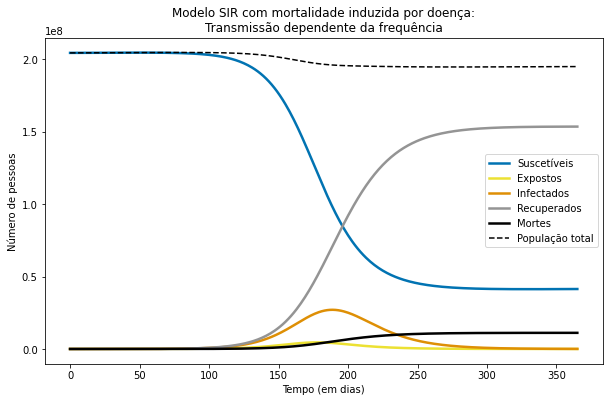

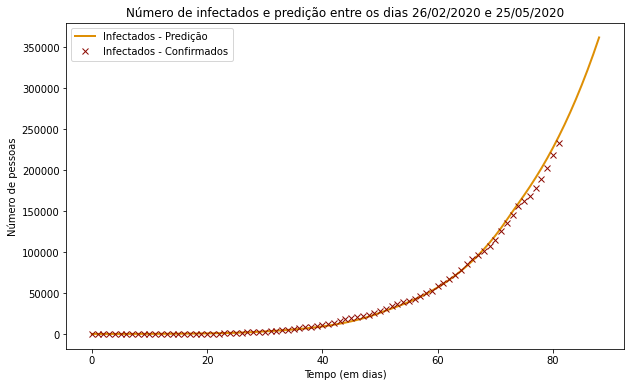

In [5]:
params = Parametros(
    pais= 'Brazil',
    μ = 6.08/(1000 * 365), υ = 14.16/(1000 * 365),
    σ=1/2,
    β=beta, γ=1/14, ρ=dataset.mortalidade(dataset.dataset('Brazil')),
    P_0 = 204_450_649, Y_0 = 50,
    N_UTI = .10, C_UTI = 15_348
)

brasil = Simulacao(params)

relatorio = brasil.simular()
relatorio.relatorio()
relatorio.plot()

Neste cenário, o pico da infecção ocorre com um valor entre um terço e um quarto da população contaminada simultaneamente com SARS-COV-19. O **pico de infectados** simultâneos ocorre em **02/09/2020**, no 189º dia de contágio (considerando data oficial do governo).

Apesar da taxa de fatalidade considerada alta, é necessário considerar que:
1. Somente após o dia 22/03 que começaram  esforços para testes além dos doentes em situação crítica. Desta forma, devem haver mais infectados que a quantidade detectada por testes;
1. Existe a possibilidade de que esteja havendo uma [grande subnotificação de casos](https://www1.folha.uol.com.br/equilibrioesaude/2020/04/estados-e-municipios-no-pais-relatam-subnotificacao-gigantesca-de-casos.shtml).

Nesta ~infeliz~ simulação, temos o falecimento de mais de 11 milhões de habitantes pela doença, causando uma redução da população de 204.450.649 para 194.997.577. Note que essas informações consideram taxas constantes de de natalidade e de mortalidade.
Entretanto, é importante destacar que, no caso de subnotificações, a taxa de infecção tende a ser maior enquanto a taxa de mortalidade tende a ser menor.

Ao verificar os últimos 14 dias do gráfico "**Número de infectados e predição entre os dias [...]**", nota-se um comportamento em que aparenta que há uma redução na taxa de transmissão, depois uma aceleração. Note, no entanto que isto se dá pela diminuição do trabalho durante os finais de semana, de forma que os dias de segunda e terça tenham uma quantidade menor de casos confirmados.

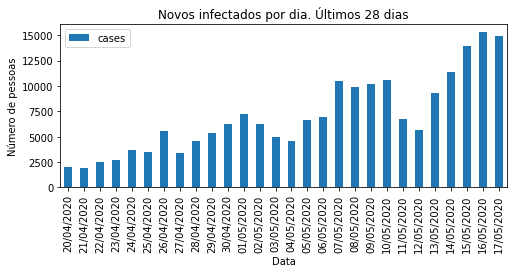

In [6]:
relatorio.plot_infectados_por_semana(ultimos_n_dias=7*4)

Em relação ao número de pacientes que necessitam de UTI, foi considerada uma taxa de 10% dos infectados. Este número leva em consideração que o total de casos que necessitam de UTI não pode ser inferior a taxa de falecimento.

Os gráficos abaixo apresentam a quantidade atual de leitos disponíveis para a população na rede pública, segundo o informado pelos estados ([Folha de São Paulo (12/05/2020)](https://www1.folha.uol.com.br/equilibrioesaude/2020/05/estados-abrem-1400-leitos-de-uti-para-covid-19-mas-ocupacao-segue-alta.shtml)). Alguns dos estados informaram a capacidade total da saúde, incluindo a rede privada. Abaixo também se encontra a simulação da quantidade de pacientes que necessitariam de leitos de UTI. 

No dia 12/05/2020, dos 15348 leitos alocados para o tratamento de pacientes de COVID-19, 65.3286760489966% estavam ocupados.
Sobrecarga do sistema de saúde público começa no 74° dia (10/05/2020) e se estendem até o 338° dia (29/01/2021).


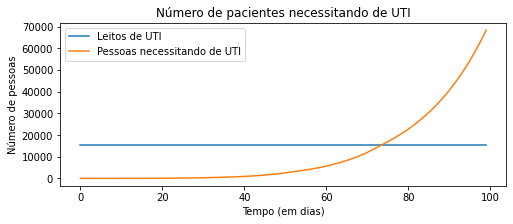

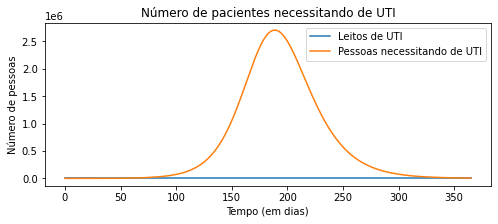

In [7]:
import pandas as pd
data = pd.read_csv('src/leitos-uti-12-05-2020.csv')
percentual_ocupacao = sum(data.uti_alocada_covid * data.percentual_ocupacao) / data.uti_alocada_covid.sum()
print(f'No dia 12/05/2020, dos {data.uti_alocada_covid.sum()} leitos alocados para o tratamento de pacientes de COVID-19, {percentual_ocupacao*100}% estavam ocupados.')

relatorio.plot_necessidade_uti(primeiros_n_dias=100)
relatorio.plot_necessidade_uti(detalhes=True)

A previsão do modelo indica que o sistema de saúde operará com a capacidade máxima a partir do 74° dia (10/05/2020), estendendo-se até o 338° dia (29/01/2021). Note, no entando que, segundo a notícia da [Folha de São Paulo](https://www1.folha.uol.com.br/equilibrioesaude/2020/05/estados-abrem-1400-leitos-de-uti-para-covid-19-mas-ocupacao-segue-alta.shtml), que é do dia 12/05/2020, a quantidade de leitos reservados ao atendimento do COVID-19 ocupados era de 65,32%. 

Consequentemente, um novo gráfico foi montado considerando que a taxa de pessoas que necessitam de leitos de UTI ($N_\text{UTI}$) corresponde a 65% da estimada, ou seja $0.1*0.65=0.065$. Para este novo valor, hoje, 17/05/2020, é considerado o dia em que todos os leitos de UTI estarão ocupados.

Sobrecarga do sistema de saúde público começa no 81° dia (17/05/2020) e se estendem até o 328° dia (19/01/2021).


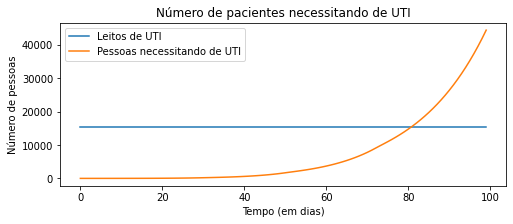

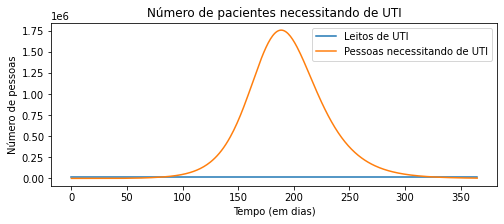

In [8]:
relatorio.plot_necessidade_uti(primeiros_n_dias=100, N_UTI=0.065)
relatorio.plot_necessidade_uti(detalhes=True, N_UTI=0.065)

Abaixo do código, são apresentados gráficos referentes a simulações para diferentes valores de taxa de transmissão. A explicação ocorre após os gráficos.

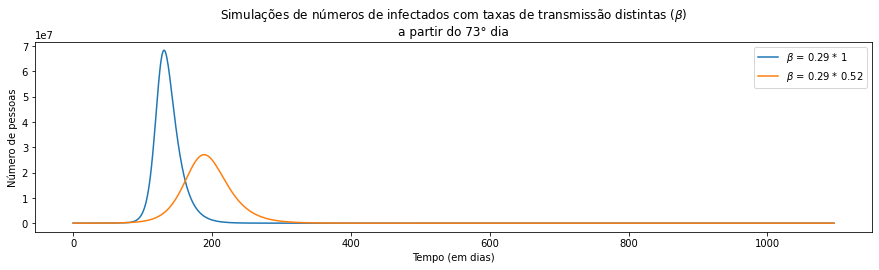

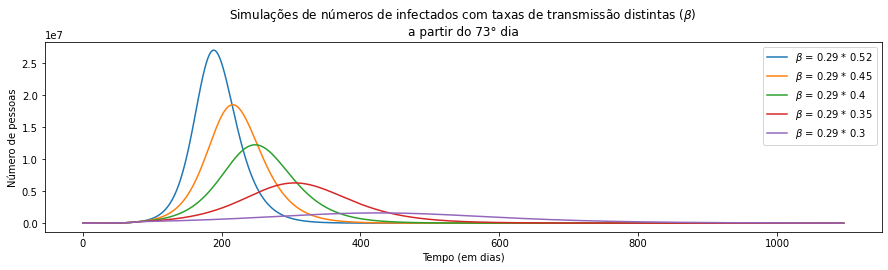

In [9]:
def gerar_beta(estimativa_final):
    def beta(t):
        β = 0.29
        if t < 30:
            return β
        elif 30 <= t < 50:
            return β*.75
        elif 50 <= t < 72:
            return β*.60
        elif 72 <= t < 79:
            return β*.52
        else:
            return β*estimativa_final
    return beta

betas = [1, .52, .45, .40, .35, .30]
relatorios = []

for estimativa_beta in betas:
    params = Parametros(
        pais= 'Brazil',
        μ = 6.08/(1000 * 365), υ = 14.16/(1000 * 365),
        σ=1/2,
        β=gerar_beta(estimativa_beta), γ=1/14, ρ=dataset.mortalidade(dataset.dataset('Brazil')),
        P_0 = 204_450_649, Y_0 = 50,
        N_UTI = .10, C_UTI = 15_348,
        numero_dias=365*3+1
    )

    brasil = Simulacao(params)
    relatorios.append(brasil.simular())

def plot_experimentos(betas, relatorios):
    infectados = []
    import pandas as pd
    for b, relatorio in zip(betas, relatorios):
        serie = pd.Series(relatorio.I, name=f'$\\beta$ = 0.29 * {b}')
        infectados.append(serie)
    ax = pd.concat(infectados, axis=1).plot(title = 'Simulações de números de infectados com taxas de transmissão distintas ($\\beta$)\na partir do 73° dia', figsize=(15, 3.5))
    ax.set_xlabel('Tempo (em dias)')
    ax.set_ylabel('Número de pessoas')

plot_experimentos(betas[:2], relatorios[:2])
plot_experimentos(betas[1:], relatorios[1:])

No primeiro gráfico acima há uma comparação entre duas situações. A primeira refere-se a aplicação de um relaxamento total das medidas de contenção de circulação de pessoas a partir do 73° dia.
O segundo refere-se a aplicação de uma medida de conteção com um isolamento de $48\%$ ($1-0.52$). Nota-se que o pico foi claramente amortizado.

O segundo gráfico, similar ao primeiro, apresenta diversas taxas de isolamento, indo dos atuais $48\%$ até os $70\%$. Para esta a situação mais branda, temos a seguinte simulação:

 País: Brazil

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 3.8794520547945204e-05
 - μ: Taxa de mortalidade (por mortes naturais): 1.6657534246575344e-05

 - γ: Taxa de recuperação: 0.07142857142857142
   -> 1/γ: Período infeccioso médio: 14.0 dias
 - ρ: Probabilidade de falecimento: 6.71%
 - β: Taxa de transmissão: 0.29 no primeiro dia

Datas
-------------------------------
26/02/2020 - Data de identificação do primeiro infectado
26/04/2021 - Dia de pico de infectados (425º dia de contágio)

População
-------------------------------
População inicial:       204.450.649 habitantes (100%)
População após 1097 dias: 205.958.383 habitantes (100.74%)
 - Diferença na população após 1097 dias: -1.507.734 de habitantes a menos
 - População morta pelo SARS-COV-2 em 1097 dias: 3.485.540 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  3435.1389630811223


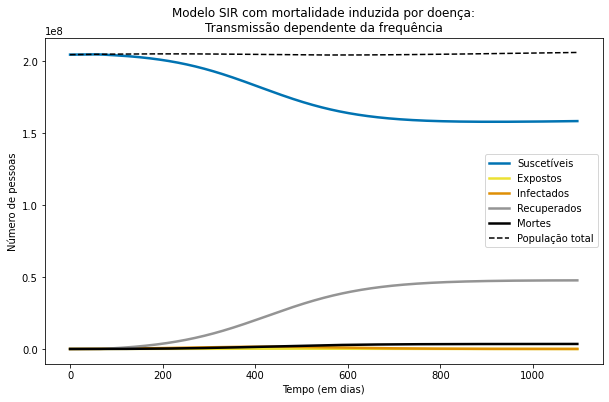

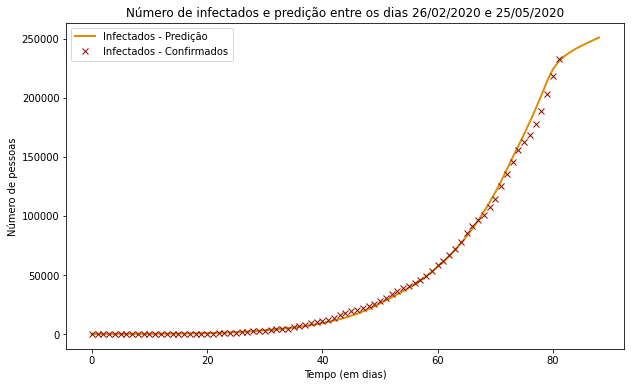

Sobrecarga do sistema de saúde público começa no 74° dia (10/05/2020) e se estendem até o 836° dia (11/06/2022).


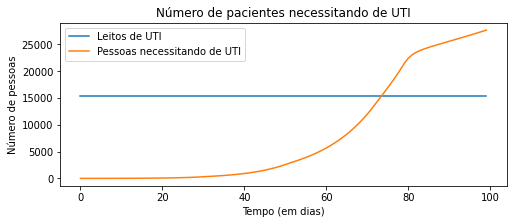

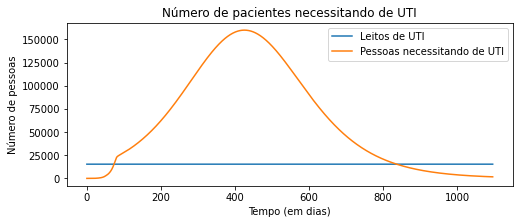

In [10]:
relatorios[-1].relatorio()
relatorios[-1].plot()

relatorios[-1].plot_necessidade_uti(primeiros_n_dias=100)
relatorios[-1].plot_necessidade_uti(detalhes=True)

Esta nova simulação considera que o governo consegue aplicar medidas restritivas que implicam na redução de circulação de pessoas em $70\%$. Em tal cenário, há um número considerável de mortes: 3.485.540 de habitantes perderiam sua vida decorrente do vírus durante os três anos simulados. O pico ocorreria muito depois comparado a simulação anterior, no dia 26/04/2021. Ainda, um perentual considerável da população não pegaria o vírus (cerca de $75\%$). 

No pico das infecções, o número de pessoas necessitando de leitos de UTI simultaneamente passaria de 150 mil.
Neste cenário, é considerado que não há um aumento da taxa de mortalidade em caso de sobrecarga do sistema de saúde. Em tal situação, a taxa de mortalidade seria mantida, e não ocorreria uma maior disponibilidade de equipamentos dado a redução do tempo médio de incubação decorrente do aumento das mortes.

Realizando o mesmo ajuste na taxa de pessoas que necessitam de leitos de UTI ($N_\text{UTI}$), ainda haveria no pico 100 mil pessoas necessitando de um Unidade de Terapia Intensiva.

Sobrecarga do sistema de saúde público começa no 83° dia (19/05/2020) e se estendem até o 784° dia (20/04/2022).


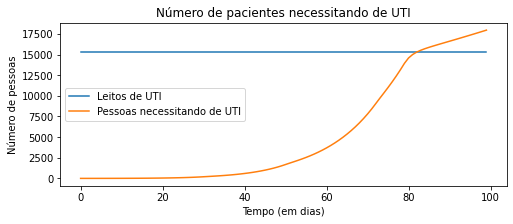

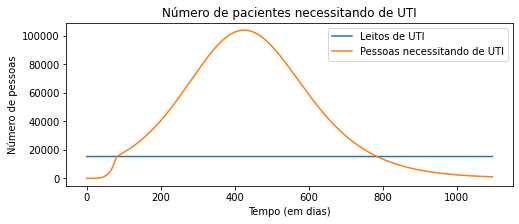

In [11]:
relatorios[-1].plot_necessidade_uti(primeiros_n_dias=100, N_UTI=0.065)
relatorios[-1].plot_necessidade_uti(detalhes=True, N_UTI=0.065)

### 2.6 Simulação para estados brasileiros

Segue abaixo a simulação discriminada por estado, para alguns estados selecionados. Parte dos parâmetrso foram utilizados com os mesmos valores do experimento referente ao Brasil, incluindo as taxas de natalidade e de mortalidade natural. Os parâmetros com valores distintos estão sinalizados.

#### 2.6.1 Ceará

Para a simulação do estado do Ceará, os seguintes parâmetros foram utilizados:


| Variável   | Valor         | Modificado | Comentários e Referência |
|------------|---------------| ---------- | ------------------------ |
| $P(0)$     | $= 9.132.078$ | Sim | [TCU 2019 e Painel Coronavirus (2020)](https://covid.saude.gov.br/) |
| $S(0)$     | $ = P(0)-E(0) = 9.132.078 - 25 = 9.132.053$ | Sim | É um vírus novo, ao contrário da gripe, por exemplo |
| $E(0)$     | $= 25$        | Sim | Estima-se que a circulação do vírus começou um mês antes do dado oficial ([Referência 1](https://canaltech.com.br/saude/coronavirus-ja-circulava-no-brasil-antes-do-que-se-pensava-afirma-fiocruz-164749/), [Referência 2](https://memorias.ioc.fiocruz.br/article/10702/0183-tracking-the-onset-date-of-the-community-spread-of-sars-cov-2-in-western-countries)). Valor assumido |
| $I(0)$     | $ = 0$        | Não |  |
| $R(0)$     | $ = 0$        | Não | São desconsiderados os casos de recuperação neste primeiro mês de infecções não contabilizadas |
| $\rho$     | Média de falecimentos estadual | Não | Até o dia 16/05/2020 - [Painel Coronavirus (2020)](https://covid.saude.gov.br/) |
| $\mu$      | $= \frac{6,08}{1000}$ ao ano $= \frac{6,08}{1000 * 365}$ ao dia | Não | [IBGE (2015)](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html) |
| $\upsilon$ | $= \frac{14,16}{1000}$ ao ano $= \frac{14,16}{1000 * 365}$ ao dia | Não | [NOTA TÉCNICA COVID-19: Um novo modelo SEIR para países em desenvolvimento – estudo de caso para a Região Metropolitana de Belém](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html) |
| $\sigma$   | $= \frac{1}{2} $ dias$^{-1}$ | Não | [Referência 1](http://www.mpf.mp.br/pa/sala-de-imprensa/documentos/2020/sumario_executivo_COVID_RMB_13042020.pdf) |
| $\beta$    | Definido no experimento | Sim | |
| $\gamma$   | $= \frac{1}{14}$ dias$^{-1}$ | Não | [NOTA TÉCNICA COVID-19: Um novo modelo SEIR para países em desenvolvimento – estudo de caso para a Região Metropolitana de Belém](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html) |
| $N_\text{UTI}$ | $= 10\%$ dos infectados | Não | Valor entre 5% e 15% - [BBC (06/04/2020)](https://www.bbc.com/portuguese/brasil-52137553) |
| $C_\text{UTI}$ | $= 1.231$ | Sim | [Governo do Estado do Ceará (11/05/2020)](https://www.ceara.gov.br/2020/05/11/ceara-amplia-numero-de-leitos-durante-a-pandemia/) |



In [12]:
dataset_ceara = dataset.dataset_estado('CE')
dataset_ceara.head(3)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,obitosAcumulado,Recuperadosnovos,emAcompanhamentoNovos,cum_cases,cum_deaths,date,dateRep,cases,deaths
15169,Nordeste,CE,NaN,23,NaN,NaN,NaN,2020-03-17,12,9132078.0,5,0,NaN,NaN,5,0,2020-03-17,2020-03-17,5,0
15170,Nordeste,CE,NaN,23,NaN,NaN,NaN,2020-03-18,12,9132078.0,9,0,NaN,NaN,9,0,2020-03-18,2020-03-18,4,0
15171,Nordeste,CE,NaN,23,NaN,NaN,NaN,2020-03-19,12,9132078.0,20,0,NaN,NaN,20,0,2020-03-19,2020-03-19,11,0


 País: None

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 3.8794520547945204e-05
 - μ: Taxa de mortalidade (por mortes naturais): 1.6657534246575344e-05

 - γ: Taxa de recuperação: 0.07142857142857142
   -> 1/γ: Período infeccioso médio: 14.0 dias
 - ρ: Probabilidade de falecimento: 6.78%
 - β: Taxa de transmissão: 0.29 no primeiro dia

Datas
-------------------------------
2020-03-17 - Data de identificação do primeiro infectado
18/08/2020 - Dia de pico de infectados (154º dia de contágio)

População
-------------------------------
População inicial:       9.132.078 habitantes (100%)
População após 366 dias: 8.703.945 habitantes (95.31%)
 - Diferença na população após 366 dias: 428.133 de habitantes a menos
 - População morta pelo SARS-COV-2 em 366 dias: 503.142 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  706.5138460873094


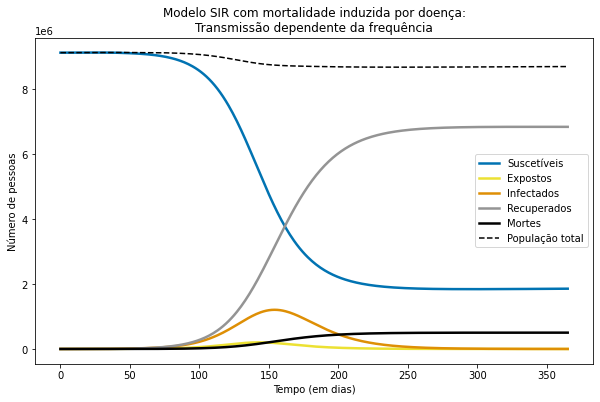

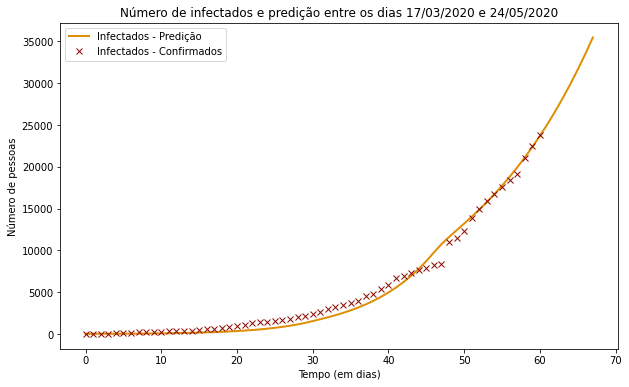

Sobrecarga do sistema de saúde público começa no 49° dia (05/05/2020) e se estendem até o 289° dia (31/12/2020).


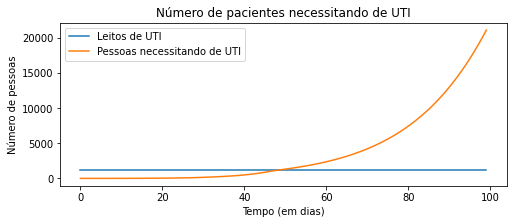

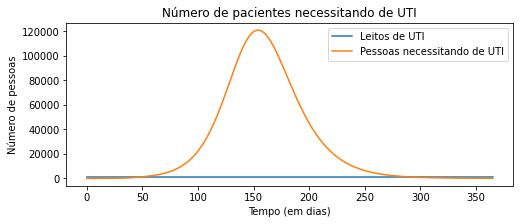

In [26]:
def beta(t):
    β = 0.29
    if t < 30:
        return β
    elif 30 <= t < 46:
        return β*.80
    else:
        return β*.52
    
params = Parametros(
    estado='CE',
    μ = 6.08/(1000 * 365), υ = 14.16/(1000 * 365),
    σ=1/2,
    β=beta, γ=1/14, ρ=dataset.mortalidade(dataset_ceara),
    P_0 = dataset_ceara.populacaoTCU2019.values[0], Y_0 = 25,
    N_UTI = .10, C_UTI = 1_231
)

ceara = Simulacao(params)

relatorio = ceara.simular()
relatorio.relatorio()
relatorio.plot()
relatorio.plot_necessidade_uti(primeiros_n_dias=100)
relatorio.plot_necessidade_uti(detalhes=True)

Para o Estado do Ceará, a função beta foi ajustada de forma a tentar simular melhor a curva de infectados.

A taxa de mortalidade atualmente computada no estado corresponde a $6,78\%$, sendo um pouco maior que a brasileira ($6,71\%$). Após um ano, 503.142 pessoas perderão a vida para a doença COVID-19. O pico dos infectados ocorre em 18/08/2020, no 154º dia de contágio, considerando a data de detecção do primeiro caso no estado.

De acordo com a simulação, a sobrecarga no número de leitos ocorreu dia 05/05/2020. Neste experimento, foram considerados todos os 1.231 leitos de UTI atualmente presentes no estado ([Governo do Estado do Ceará - 11/05/2020](https://www.ceara.gov.br/2020/05/11/ceara-amplia-numero-de-leitos-durante-a-pandemia/)). Dentre este período, foi noticiado a lotação e a aquicição de mais leitos de UTI ([O Globo - 22/04/2020](https://oglobo.globo.com/sociedade/apos-atingir-lotacao-ceara-consegue-folga-na-ocupacao-de-utis-24387610)).

#### 2.6.2 São Paulo

Para a simulação do Estado de São Paulo, os seguintes parâmetros foram utilizados:


| Variável   | Valor         | Modificado | Comentários e Referência |
|------------|---------------| ---------- | ------------------------ |
| $P(0)$     | $= 45.919.049$ | Sim | [TCU 2019 e Painel Coronavirus (2020)](https://covid.saude.gov.br/) |
| $S(0)$     | $ = P(0)-E(0) = 45.919.049 - 20 = 45.919.029$ | Sim | É um vírus novo, ao contrário da gripe, por exemplo |
| $E(0)$     | $= 20$        | Sim | Estima-se que a circulação do vírus começou um mês antes do dado oficial ([Referência 1](https://canaltech.com.br/saude/coronavirus-ja-circulava-no-brasil-antes-do-que-se-pensava-afirma-fiocruz-164749/), [Referência 2](https://memorias.ioc.fiocruz.br/article/10702/0183-tracking-the-onset-date-of-the-community-spread-of-sars-cov-2-in-western-countries)). Valor assumido |
| $I(0)$     | $ = 0$        | Não |  |
| $R(0)$     | $ = 0$        | Não | São desconsiderados os casos de recuperação neste primeiro mês de infecções não contabilizadas |
| $\rho$     | Média de falecimentos estadual | Não | Até o dia 16/05/2020 - [Painel Coronavirus (2020)](https://covid.saude.gov.br/) |
| $\mu$      | $= \frac{6,08}{1000}$ ao ano $= \frac{6,08}{1000 * 365}$ ao dia | Não | [IBGE (2015)](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html) |
| $\upsilon$ | $= \frac{14,16}{1000}$ ao ano $= \frac{14,16}{1000 * 365}$ ao dia | Não | [NOTA TÉCNICA COVID-19: Um novo modelo SEIR para países em desenvolvimento – estudo de caso para a Região Metropolitana de Belém](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html) |
| $\sigma$   | $= \frac{1}{2} $ dias$^{-1}$ | Não | [Referência 1](http://www.mpf.mp.br/pa/sala-de-imprensa/documentos/2020/sumario_executivo_COVID_RMB_13042020.pdf) |
| $\beta$    | Definido no experimento | Sim | |
| $\gamma$   | $= \frac{1}{14}$ dias$^{-1}$ | Não | [NOTA TÉCNICA COVID-19: Um novo modelo SEIR para países em desenvolvimento – estudo de caso para a Região Metropolitana de Belém](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html) |
| $N_\text{UTI}$ | $= 10\%$ dos infectados | Não | Valor entre 5% e 15% - [BBC (06/04/2020)](https://www.bbc.com/portuguese/brasil-52137553) |
| $C_\text{UTI}$ | $= 5.675$ | Sim | [Folha de São Paulo (12/05/2020)](https://www1.folha.uol.com.br/equilibrioesaude/2020/05/estados-abrem-1400-leitos-de-uti-para-covid-19-mas-ocupacao-segue-alta.shtml) |


 País: None

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 3.8794520547945204e-05
 - μ: Taxa de mortalidade (por mortes naturais): 1.6657534246575344e-05

 - γ: Taxa de recuperação: 0.07142857142857142
   -> 1/γ: Período infeccioso médio: 14.0 dias
 - ρ: Probabilidade de falecimento: 7.66%
 - β: Taxa de transmissão: 0.29 no primeiro dia

Datas
-------------------------------
2020-02-26 - Data de identificação do primeiro infectado
29/08/2020 - Dia de pico de infectados (185º dia de contágio)

População
-------------------------------
População inicial:       45.919.049 habitantes (100%)
População após 366 dias: 43.451.799 habitantes (94.63%)
 - Diferença na população após 366 dias: 2.467.250 de habitantes a menos
 - População morta pelo SARS-COV-2 em 366 dias: 2.844.688 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  1678.6674856639834


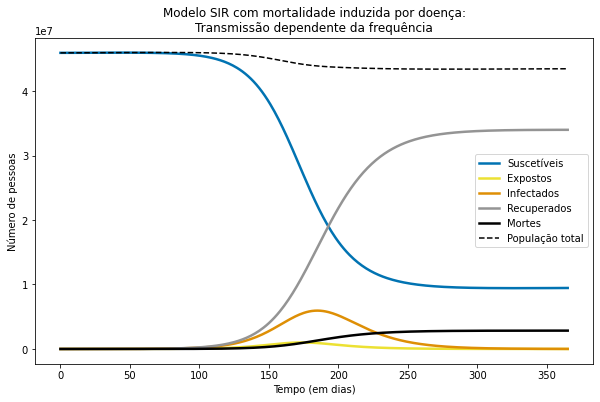

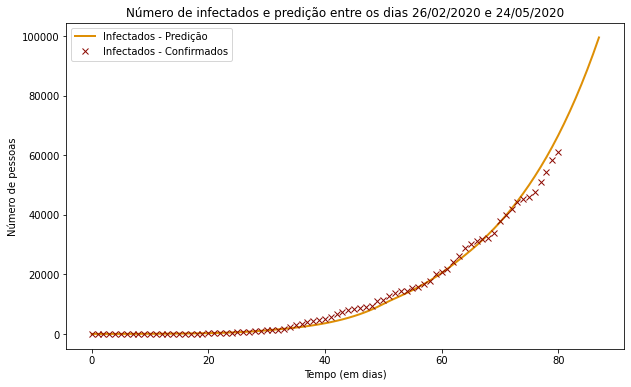

Sobrecarga do sistema de saúde público começa no 78° dia (14/05/2020) e se estendem até o 322° dia (13/01/2021).


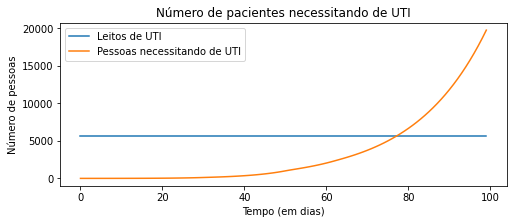

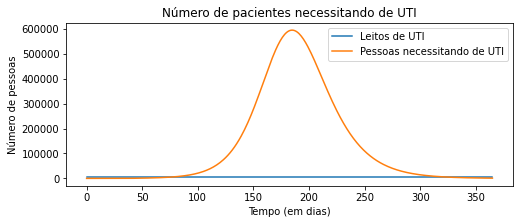

In [32]:
def beta(t):
    β = 0.29
    if t < 30:
        return β
    elif 30 <= t < 50:
        return β*.75
    elif 50 <= t < 62:
        return β*.56
    else:
        return β*.52

dataset_sao_paulo = dataset.dataset_estado('SP')
dataset_sao_paulo.head(3)

params = Parametros(
    estado='SP',
    μ = 6.08/(1000 * 365), υ = 14.16/(1000 * 365),
    σ=1/2,
    β=beta, γ=1/14, ρ=dataset.mortalidade(dataset_sao_paulo),
    P_0 = dataset_sao_paulo.populacaoTCU2019.values[0], Y_0 = 20,
    N_UTI = .10, C_UTI = 5_675
)

sao_paulo = Simulacao(params)

relatorio = sao_paulo.simular()
relatorio.relatorio()
relatorio.plot()
relatorio.plot_necessidade_uti(primeiros_n_dias=100)
relatorio.plot_necessidade_uti(detalhes=True)

Para o Estado de São Palo, a função beta foi ajustada de forma a tentar simular melhor a curva de infectados.

A taxa de mortalidade atualmente computada no estado corresponde a $7,66\%$, maior que a média nacional ($6,71\%$). Após um ano, 2.844.688 pessoas perderão a vida para a doença COVID-19. O pico dos infectados ocorre em 29/08/2020, no 185º dia de contágio, considerando a data de detecção do primeiro caso no estado.

De acordo com a simulação, a sobrecarga no número de leitos ocorreu dia 14/05/2020. Neste experimento, foram considerados 5.675 leitos de UTI, conforme apuração do jornal [Folha de São Paulo (12/05/2020)](https://www1.folha.uol.com.br/equilibrioesaude/2020/05/estados-abrem-1400-leitos-de-uti-para-covid-19-mas-ocupacao-segue-alta.shtml). Segundo o [Portal de Notícias G1, em 08/05/2020](https://g1.globo.com/sp/sao-paulo/noticia/2020/05/08/taxa-de-ocupacao-de-leitos-chega-a-90percent-na-grande-sao-paulo.ghtml) havia ocupação dos leitos de UTI em $89,6\%$.

#### 2.6.3 Santa Catarina

Para a simulação do Estado Santa Catarina, os seguintes parâmetros foram utilizados:

| Variável   | Valor         | Modificado | Comentários e Referência |
|------------|---------------| ---------- | ------------------------ |
| $P(0)$     | $= 7.164.788$ | Sim | [TCU 2019 e Painel Coronavirus (2020)](https://covid.saude.gov.br/) |
| $S(0)$     | $ = P(0)-E(0) = 7.164.788 - 10 = 7.164.778$ | Sim | É um vírus novo, ao contrário da gripe, por exemplo |
| $E(0)$     | $= 20$        | Sim | Estima-se que a circulação do vírus começou um mês antes do dado oficial ([Referência 1](https://canaltech.com.br/saude/coronavirus-ja-circulava-no-brasil-antes-do-que-se-pensava-afirma-fiocruz-164749/), [Referência 2](https://memorias.ioc.fiocruz.br/article/10702/0183-tracking-the-onset-date-of-the-community-spread-of-sars-cov-2-in-western-countries)). Valor assumido |
| $I(0)$     | $ = 0$        | Não |  |
| $R(0)$     | $ = 0$        | Não | São desconsiderados os casos de recuperação neste primeiro mês de infecções não contabilizadas |
| $\rho$     | Média de falecimentos estadual | Não | Até o dia 16/05/2020 - [Painel Coronavirus (2020)](https://covid.saude.gov.br/) |
| $\mu$      | $= \frac{6,08}{1000}$ ao ano $= \frac{6,08}{1000 * 365}$ ao dia | Não | [IBGE (2015)](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-mortalidade.html) |
| $\upsilon$ | $= \frac{14,16}{1000}$ ao ano $= \frac{14,16}{1000 * 365}$ ao dia | Não | [NOTA TÉCNICA COVID-19: Um novo modelo SEIR para países em desenvolvimento – estudo de caso para a Região Metropolitana de Belém](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html) |
| $\sigma$   | $= \frac{1}{2} $ dias$^{-1}$ | Não | [Referência 1](http://www.mpf.mp.br/pa/sala-de-imprensa/documentos/2020/sumario_executivo_COVID_RMB_13042020.pdf) |
| $\beta$    | Definido no experimento | Sim | |
| $\gamma$   | $= \frac{1}{14}$ dias$^{-1}$ | Não | [NOTA TÉCNICA COVID-19: Um novo modelo SEIR para países em desenvolvimento – estudo de caso para a Região Metropolitana de Belém](https://brasilemsintese.ibge.gov.br/populacao/taxas-brutas-de-natalidade.html) |
| $N_\text{UTI}$ | $= 10\%$ dos infectados | Não | Valor entre 5% e 15% - [BBC (06/04/2020)](https://www.bbc.com/portuguese/brasil-52137553) |
| $C_\text{UTI}$ | $= 498$ | Sim | [Folha de São Paulo (12/05/2020)](https://www1.folha.uol.com.br/equilibrioesaude/2020/05/estados-abrem-1400-leitos-de-uti-para-covid-19-mas-ocupacao-segue-alta.shtml) |


 País: None

Parâmetros
-------------------------------
 - υ: Taxa de natalidade: 3.8794520547945204e-05
 - μ: Taxa de mortalidade (por mortes naturais): 1.6657534246575344e-05

 - γ: Taxa de recuperação: 0.07142857142857142
   -> 1/γ: Período infeccioso médio: 14.0 dias
 - ρ: Probabilidade de falecimento: 1.73%
 - β: Taxa de transmissão: 0.29 no primeiro dia

Datas
-------------------------------
2020-03-13 - Data de identificação do primeiro infectado
04/09/2020 - Dia de pico de infectados (175º dia de contágio)

População
-------------------------------
População inicial:       7.164.788 habitantes (100%)
População após 366 dias: 7.120.312 habitantes (99.38%)
 - Diferença na população após 366 dias: 44.476 de habitantes a menos
 - População morta pelo SARS-COV-2 em 366 dias: 104.889 habitantes


Comparação com o cenário atual
-------------------------------
RMSE:  249.59161698988362


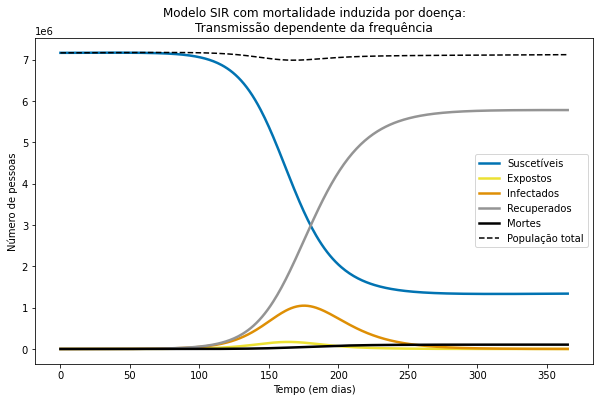

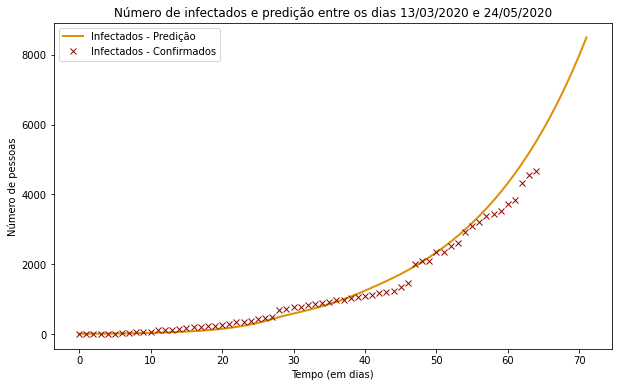

Sobrecarga do sistema de saúde público começa no 63° dia (15/05/2020) e se estendem até o 327° dia (03/02/2021).


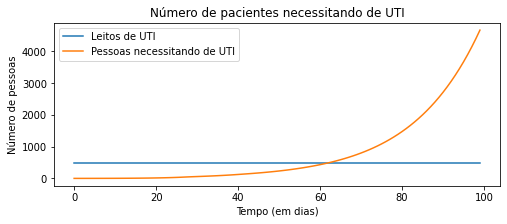

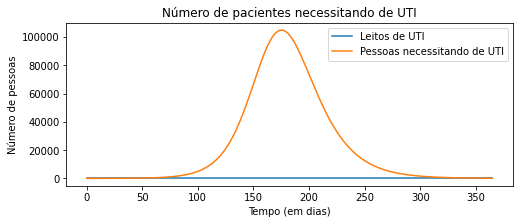

In [53]:
def beta(t):
    β = 0.29
    if t < 27:
        return β
    elif 27 <= t < 40:
        return β*.58
    elif 40 <= t < 48:
        return β*.52
    else:
        return β*.52

dataset_santa_catarina = dataset.dataset_estado('SC')
dataset_santa_catarina.head(3)

params = Parametros(
    estado='SC',
    μ = 6.08/(1000 * 365), υ = 14.16/(1000 * 365),
    σ=1/2,
    β=beta, γ=1/14, ρ=dataset.mortalidade(dataset_santa_catarina),
    P_0 = dataset_santa_catarina.populacaoTCU2019.values[0], Y_0 = 10,
    N_UTI = .10, C_UTI = 498
)

santa_catarina = Simulacao(params)

relatorio = santa_catarina.simular()
relatorio.relatorio()
relatorio.plot()
relatorio.plot_necessidade_uti(primeiros_n_dias=100)
relatorio.plot_necessidade_uti(detalhes=True)

Para o Estado Santa Catarina, a função beta foi ajustada de forma a tentar simular melhor a curva de infectados.

A taxa de mortalidade atualmente computada no estado corresponde a $1,73\%$, sendo um número consideravelmente menor que a média nacional ($6,71\%$). Após um ano, 104.889 pessoas perderão a vida para a doença COVID-19. O pico dos infectados ocorre em 04/09/2020, no 175º dia de contágio, considerando a data de detecção do primeiro caso no estado.


De acordo com a simulação, a sobrecarga no número de leitos ocorreu dia 15/05/2020. Neste experimento, foram considerados 498 leitos de UTI, conforme apuração do jornal [Folha de São Paulo (12/05/2020)](https://www1.folha.uol.com.br/equilibrioesaude/2020/05/estados-abrem-1400-leitos-de-uti-para-covid-19-mas-ocupacao-segue-alta.shtml). Segundo o jornal [Folha de São Paulo, em 12/05/2020](https://www1.folha.uol.com.br/equilibrioesaude/2020/05/estados-abrem-1400-leitos-de-uti-para-covid-19-mas-ocupacao-segue-alta.shtml) havia ocupação dos leitos de UTI em $17,1\%$, um percentual significamente inferior, comparado aos outros estados.

### 2.6 Discussões e considerações finais

Neste trabalho foram apresentadas simulações referentes ao Brasil e aos estados do Ceará, de São Paulo e Santa Catarina. 
Nas simulações, foram utilizando dados demográficos de 2015 obtidos a partir do IBGE.
Em todos os cenários, foi considerado um período de infectabilidade de 14 dias. Cada simulação utilizou a taxa de mortalidade até então apresentada para o COVID-19 referente a localidade.

Em todos os centários, a definição da taxa de transmissão do vírus foi feita por um processo de busca manual da taxa cujo RMSE (_root-mean-square error_ ou _raiz do erro médio quadrático_) apresentasse o menor valor. A função RMSE é dada por
\begin{align}
\text{RMSE}(\mathbf{\hat{y}}, \mathbf{y}) = \sqrt{\frac{\sum_{t=1}^{T}(\hat{y}_{t} - y_{t})^2}{T}},
\end{align}
onde o vetor $\mathbf{\hat{y}}$ corresponde aos valores estimados do número de infectados por dia pelo modelo e o vetor $\mathbf{y}$ corresponde os números oficiais de infectados por dia.
É importante pontuar que o número alto do RMSE indicado pelos experimentos se dá pelo resultado da função possui a mesma dimensão dos dados de entrada. Foi considerado utilizar a média das variações de casos a cada dia, entretanto esta medida apresentou resultados mais distantes dos dados reaís para o cenário brasileiro.

O principal ponto ajustado nas simulações foi a função que informa o valor de taxa de infectabilidade ($\beta$) para um instante de tempo $t$. Apesar das informações de medidas de contenção serem públicas, é complicado ajustar o gráfico a partir de tais informações, visto que
1. há uma descentralização desses dados, e;
1. que os dados obtidos referentes às infecções consideram os dias dos resultados dos testes, não os dias de coleta.

Para os cenários simulados, o vírus se espalha de forma que o pico da panedemia chega entre 154º dia e o 189° dia.
Nos cenários, há uma redução populacional considerável.

Nota-se nos gráficos que comparam o número real de infectados com o número predito de infectados que a predição não acompanha com fidelidade os casos reais. Dentre as hipóteses, podemos considerar o resultado das ações de mitigação tomadas pelos governos (nacional, estaduais e municipais), uma inadequação do modelo ou dados não consistentes com a realidade, incluindo a falta de testes em massa na população para a doença e uma possível subnotificação de casos.

Especificamente para o cenário em que considera todo o Brasil, nota-se uma situação bem mais pessimista do que o estipulado no artigo [The Global Impact of COVID-19 and Strategies for Mitigation and Suppression](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020.pdf) do _Imperial College COVID-19 Response Team_ para o Brasil. Destacando o pior e o melhor cenário: 

* Cenário 1 – Sem medidas de mitigação:
  - População total: 212.559.409
  - População infectada: 187.799.806
  - Mortes: 1.152.283
  - Indivíduos necessitando hospitalização: 6.206.514
  - Indivíduos necessitando UTI: 1.527.536
* Cenário 5 – Com supressão precoce:
  - População total: 212.559.409
  - População infectada: 11.457.197
  - Mortes: 44.212
  - Indivíduos necessitando hospitalização: 250.182
  - Indivíduos necessitando UTI: 57.423
  - Demanda por hospitalização no pico da pandemia: 72.398
  - Demanda por leitos de UTI no pico da pandemia: 15.432

Nos esforços tomados neste trabalho, não foi obtido êxito na diminuição da explosão de infectados, de forma que ainda respeitasse os valores correspondentes aos dados reais para o Brasil. Assim, consequentemente, o número de mortes apresentou-se bem mais elevado do que as simulações de referência.

Dentre os pontos observados, nota-se que com uma grande quantidade de infecções, o sistema de saúde torna-se saturado em um tempo consideravelmente rápido. Para a simulação da nação, mesmo com uma taxa de isolamento de 70% dos casos e com $6,5\%$ dos pacientes necessitando de UTI, o sistema deixa de atender a população de modo que uma grande quantidade de pessoas não consegue de atendimento.

Por fim, vale citar o Estado Santa Catarina. Este estado, com população similar ao do Ceará e tendo o primeiro caso infectado no estado anterior ao Ceará, apresenta uma taxa de mortalidade consideravelmente pequena ($1,73\%$). Não foram encontradas quaisquer evidências que justifique este comportamento. Uma hipótese é que para os estados do Ceará e de São Paulo, o primeiro caso ocorreu antes do computado oficialmente.

Como trabalhos futuros, recomendo um estudo d[o artigo citado acima](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020.pdf). Recomendo também considerar uma taxa de mortalidade maior para quando o sistema de saúde estiver sobrecarregado. Ainda, recomendo a leitura e experimentação do [Epidemic Calculator](http://gabgoh.github.io/COVID/index.html), uma ferramenta online com suporte a uma série de parêmetros para simulação, incluindo estratégias de mitigação.

## Referências

* European Centre for Disease Prevention and Control. **Download today’s data on the geographic distribution of COVID-19 cases worldwide**: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
* WIKIPEDIA. **Modelo epidêmico - O Modelo SIR**: https://pt.wikipedia.org/wiki/Modelo_epid%C3%AAmico#O_Modelo_SIR
* KEELING, Matt J.; ROHANI, Pejman. **Modeling infectious diseases in humans and animals**. Princeton University Press, 2011.
  * Material suplementar: http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/index.html
* IDM docs » HIV » Generic model overview » Compartmental models and EMOD » **SEIR and SEIRS models**. 
  * Disponível em https://www.idmod.org/docs/hiv/model-seir.html
* FRANCÊS, Carlos Renato Lisboa, et. al. **COVID-19: Um novo modelo SEIR para países em desenvolvimento–estudo de caso para a Região Metropolitana de Belém**, abril de 2020.
* WALKER, Patrick GT et al. **The Global Impact of COVID-19 and Strategies for Mitigation and Suppression. On behalf of the imperial college covid-19 response team, Imperial College of London**, 2020.
* DELATORRE, E.; MIR, D.; GRÄF, T; BELLO, G. **Tracking the onset date of the community spread of SARS-CoV-2 in Western Countries** 
in Mem Inst Oswaldo Cruz, Rio de Janeiro, FAST TRACK, in 24 April 2020.
 * Disponível em https://memorias.ioc.fiocruz.br/article/10702/0183-tracking-the-onset-date-of-the-community-spread-of-sars-cov-2-in-western-countries
  * Disponível em https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Global-Impact-26-03-2020.pdf
* IBGE. **Brasil em síntese**: https://brasilemsintese.ibge.gov.br/populacao.html
* Agencia Brasil - EBC. **População brasileira supera os 204 milhões**: https://agenciabrasil.ebc.com.br/internacional/noticia/2015-08/populacao-brasileira-supera-os-204-milhoes
* CANZIAN, Fernando. **Estados e municípios no país relatam subnotificação gigantesca de casos** in Folha de São Paulo: https://www1.folha.uol.com.br/equilibrioesaude/2020/04/estados-e-municipios-no-pais-relatam-subnotificacao-gigantesca-de-casos.shtml
* MACROTRENDS. **Global comparative data**. https://www.macrotrends.net/countries/topic-overview 
  * Taxas de natalidade e mortalidade de países
* INDEX MUNDI. **Polulação**: https://www.indexmundi.com/
* GAMIO, Lazaro; CAI, Weiyi and HASSAN, Adeel. **Where the U.S. Stands Now on Coronavirus Testing** in The New Work Times: https://www.nytimes.com/interactive/2020/03/26/us/coronavirus-testing-states.html
* MC_KINLEY, Jesse. **New York City Region Is Now an Epicenter of the Coronavirus Pandemic** in The New Work Times: https://www.nytimes.com/2020/03/22/nyregion/Coronavirus-new-York-epicenter.html